Fitting the experimental data by the folowing formula:

$$y(P) = b + (m - b)\cdot \left( \frac{S+P+Kd - \sqrt{(S + P + Kd)^{2} - 4 SP}}{2 S} \right) $$

There are some conditions:
+ b = Amin > 0;
+ m = Amax;
+ Amin < Amax <= 0.4
+ Kd > 0

We need to search for:

+ Kd,
+ b,
+ m,
+ Chi^2
+ R^2

In [1]:
import os
import glob
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, leastsq
from scipy.stats import chisquare, linregress

In [2]:
def y_P(X, Kd):
    S, P = X
    return b + (m - b)*((S + P + Kd - (((S + P + Kd)**2) - 4*S*P)**0.5)/2*S)

In [3]:
files = sorted(glob.glob('data/*.csv'))
param_table = pd.DataFrame(columns=[
    'file',
    'b',
    'm',
    'Kd',
    'Chi^2',
    'R^2'
])

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


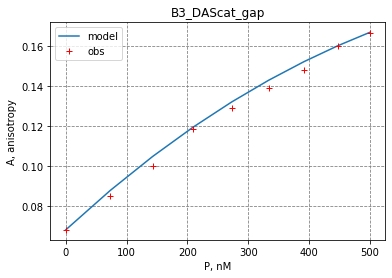

In [6]:
for idx, file in enumerate(files):
    table = pd.read_csv(file, sep='\t')
    
    name_smt = os.path.basename(file)[:-4]
    y = table['A, anisotropy']
    b = table['A, anisotropy'].min()
    m = table['A, anisotropy'].max()
    Kd = 1
    popt,pcov = curve_fit(y_P,(table.S, table.P),y,p0=[Kd])
    Kd_model = popt[0]
    y_model = y_P((table.S, table.P),*popt)
    plt.clf()
    plt.title(name_smt)
    plt.ylabel('A, anisotropy')
    plt.xlabel('P, nM')
    plt.plot(table.P, y_model, label='model')
    plt.plot(table.P, table['A, anisotropy'], '+', color='red', label='obs')
    plt.grid(True, ls='--', color='gray')
    plt.legend()
    plt.savefig(f'images/{name_smt}.png', format='png', dpi=700)
    
    param_table.loc[idx] = [
        name_smt,
        round(b, 3),
        round(m, 3),
        round(Kd_model, 2),
        '{:.2e}'.format(chisquare(f_obs=y, f_exp=y_model)[0]),
        round(linregress(table.P, y_model)[2], 3)
    ]

In [7]:
param_table

,file,b,m,Kd,Chi^2,R^2
0,A1_WT_gap,0.044,0.172,1.18268e+07,1.19e+00,1.000
1,A2_V43I_gap,0.044,0.172,1.18268e+07,1.19e+00,1.000
2,A3_WT_fork,0.044,0.156,1.32619e+07,1.77e-01,1.000
3,A4_V43I_fork,0.046,0.173,1.21254e+07,2.72e-01,1.000
4,B1_WT_gap,0.051,0.103,6.32636e+06,1.90e-02,0.993
5,B2_WTcat_gap,0.069,0.164,6.27371e+06,2.21e-02,0.993
6,B3_DAScat_gap,0.068,0.166,7.53939e+06,5.70e-04,0.993


In [8]:
param_table.to_csv('fit_params.csv', sep=',')

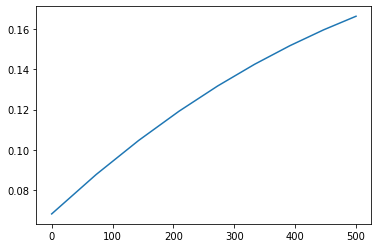

In [9]:
b = 0.068
m = 0.166
y_model = y_P((table.S, table.P), 7.53939e+06)
plt.plot(table.P, y_model)